***HY473 - Pattern Recognition***

**Assignment 4**

**Exercise 1: Single-sample Perceptron**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Create a **scatter plot** of the dataset. Is the dataset **linearly separable**? Justify your answer in 1-2 sentences.


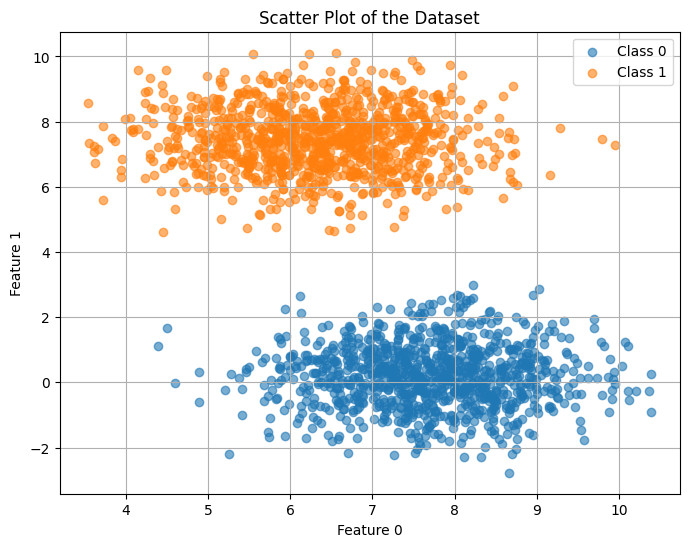

In [32]:
dataset = pd.read_csv("dataset.csv")
plt.figure(figsize=(8, 6))
for label in dataset['labels'].unique():
    subset = dataset[dataset['labels'] == label]
    plt.scatter(subset['feature_0'], subset['feature_1'], label=f"Class {label}", alpha=0.6)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Scatter Plot of the Dataset')
plt.legend()
plt.grid(True)
plt.show()


The scatter plot shows that the two classes are **well separated** by Feature 1. One group has high values, and the other has low values, with a clear gap in between. **A simple horizontal line can separate them.**

2. Create a function called `train_single_sample` that **implements** the **Fixed-Increment Single-Sample Perceptron algorithm**.

The **arguments** of the function should be:

-  **a := weights + bias** (bias trick)

-  **y := data + ’1’s** (bias trick)

-  **labels**

-  **n iterations** := the number of iterations or updates

-  **lr := learning rate**

-  **variable_lr** := boolean

and the function should **return**:
-  **a := trained model**
-  **acc_history** := list of accuracy values at every iteration

Call the function `train_single_sample` to **train a linear model** and print the trained model. Also, **print the model’s accuracy every n samples iterations.**

**Use** the following **hyperparameters**:

(a) **n iterations = 30001**

(b) **lr=1**

(c) **variable lr = False** (Set it False for now, you will set it True in Question 5).


In [33]:
def train_single_sample(a, y, labels, n_iterations=30001, lr=1, variable_lr=False):
    acc_history = []
    n = len(y)
    k = 0

    for i in range(n_iterations):
        index = i % n

        if labels[index] == 1:
            true_label = 1
        else:
            true_label = -1

        dot_prod = np.dot(a, y[index])

        if dot_prod >= 0:
            pred = 1
        else:
            pred = -1

        if pred != true_label:
            if variable_lr:
                k += (i % n)
                if k!=0:
                  alpha = 1 / np.sqrt(k)
                else:
                  alpha = 1
            else:
                alpha = lr
            a = a + alpha * true_label * y[index]

        if i % n == 0:
            predictions = np.sign(np.dot(y, a))
            true_labels = np.where(labels == 1, 1, -1)
            acc = np.mean(predictions == true_labels)
            acc_history.append(acc)
            print(f"Iteration {i}: Accuracy = {acc:.4f}")

    return a, acc_history

X = dataset[['feature_0', 'feature_1']].values
X_bias = np.hstack([X, np.ones((X.shape[0], 1))])
labels = dataset['labels'].values
y = X_bias
a_init = np.zeros(y.shape[1])

trained_a, acc_history = train_single_sample(a_init, y, labels, n_iterations=30001, lr=1, variable_lr=False)
print("Trained model parameters:", trained_a)


Iteration 0: Accuracy = 0.5000
Iteration 2000: Accuracy = 1.0000
Iteration 4000: Accuracy = 1.0000
Iteration 6000: Accuracy = 1.0000
Iteration 8000: Accuracy = 1.0000
Iteration 10000: Accuracy = 1.0000
Iteration 12000: Accuracy = 1.0000
Iteration 14000: Accuracy = 1.0000
Iteration 16000: Accuracy = 1.0000
Iteration 18000: Accuracy = 1.0000
Iteration 20000: Accuracy = 1.0000
Iteration 22000: Accuracy = 1.0000
Iteration 24000: Accuracy = 1.0000
Iteration 26000: Accuracy = 1.0000
Iteration 28000: Accuracy = 1.0000
Iteration 30000: Accuracy = 1.0000
Trained model parameters: [-8.84231287 16.15923121 -1.        ]


###Bonus

We use the following convention:

- If **score = a · y ≥ 0** → predict **class a** (label = +1)
- If **score < 0** → predict **class b** (label = –1)



**All 4 Prediction–True Label Combinations**

| True Label | Predicted Label | Is Prediction Correct? | Update Needed? |
|------------|------------------|-------------------------|----------------|
| +1         | +1               |  Yes                  |  No          |
| +1         | –1               |  No                   |  Yes         |
| –1         | –1               |  Yes                  |  No          |
| –1         | +1               |  No                   |  Yes         |


When the prediction is **incorrect**, we update the weight vector as:

***a = a + α · y · label***

Where:
- **α** is the **learning rate**
- **y** is the **input vector**(including bias)
- **label** is either +1 or –1 (the true class label)

This update moves the decision boundary to reduce future misclassification.


If a point is misclassified:
- For **label = +1**, we move `a` closer to `y` (increase score)
- For **label = –1**, we move `a` away from `y` (decrease score)

This improves the likelihood of correct classification on the next pass.

**Can Any Label Values Be Used Instead of +1 and –1?**

-  No, the algorithm assumes **bipolar labels** (+1 and –1)
- If original labels are 0 and 1:
  - You **must convert** them: 0 → –1, 1 → +1
- This ensures the arithmetic of the update rule behaves correctly.





3. **Plot the history of the accuracy** during training.


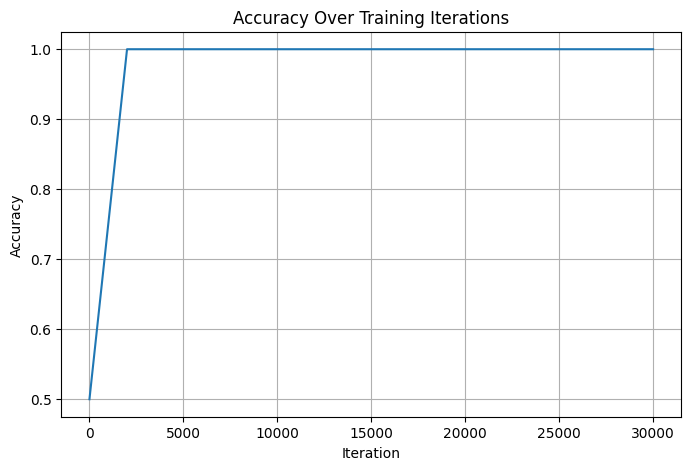

In [37]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(0, len(acc_history)) * 2000, acc_history)
plt.title("Accuracy Over Training Iterations")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


The plot shows that **the model's accuracy rapidly increases and stabilizes at 100%, indicating successful convergence.**

4. Create a function called `plot_model` that takes as input the **trained weights** (+ bias), the **data**, and the **labels** and **returns** a scatter plot with the decision boundaries of the model **κείμενο με έντονη γραφή** (Hint: you can use plt.contour()). Call the function you implemented to plot the data along with the trained model.

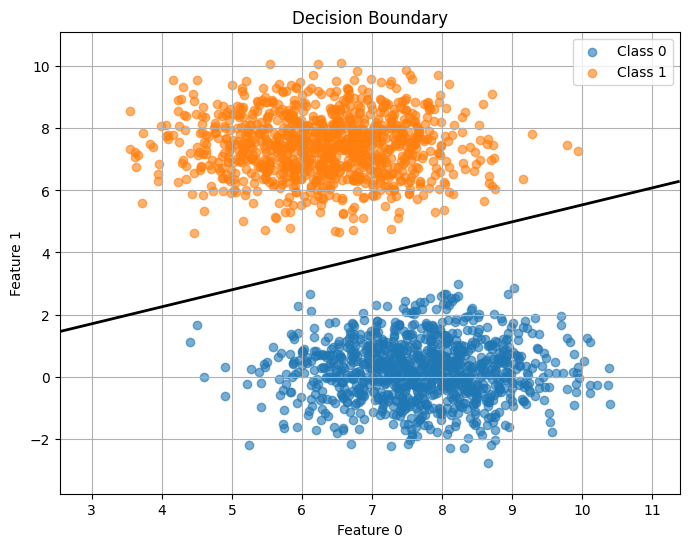

In [42]:
def plot_model(a, data, labels):
    plt.figure(figsize=(8, 6))
    for label in np.unique(labels):
        subset = data[labels == label]
        plt.scatter(subset[:, 0], subset[:, 1], label=f"Class {label}", alpha=0.6)

    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.size)]
    Z = np.dot(grid, a).reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.title("Decision Boundary")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_model(trained_a, X, labels)


The plot **clearly shows the decision boundary successfully separating the two classes** — confirming the model has learned a good linear separator.

5. Now we are going to **retrain our model** but with a variable learning rate. Create a ’Scheduler’ class that implements a function `get_next_lr` that every time it is called **returns the next learning rate**. The object should work according to the Equation at the beginning of the assignment. Now configure the training function `train_single_sample` to use this object when **variable_lr = True**. **Retrain the model with a variable learning rate.** **Plot the dataset and the trained model as before using the function `plot_model`** . What is the main difference compared to training with a fixed learning rate? What method do you think is better? Justify your answer.


Iteration 0: Accuracy = 0.5000
Iteration 2000: Accuracy = 1.0000
Iteration 4000: Accuracy = 1.0000
Iteration 6000: Accuracy = 1.0000
Iteration 8000: Accuracy = 1.0000
Iteration 10000: Accuracy = 1.0000
Iteration 12000: Accuracy = 1.0000
Iteration 14000: Accuracy = 1.0000
Iteration 16000: Accuracy = 1.0000
Iteration 18000: Accuracy = 1.0000
Iteration 20000: Accuracy = 1.0000
Iteration 22000: Accuracy = 1.0000
Iteration 24000: Accuracy = 1.0000
Iteration 26000: Accuracy = 1.0000
Iteration 28000: Accuracy = 1.0000
Iteration 30000: Accuracy = 1.0000


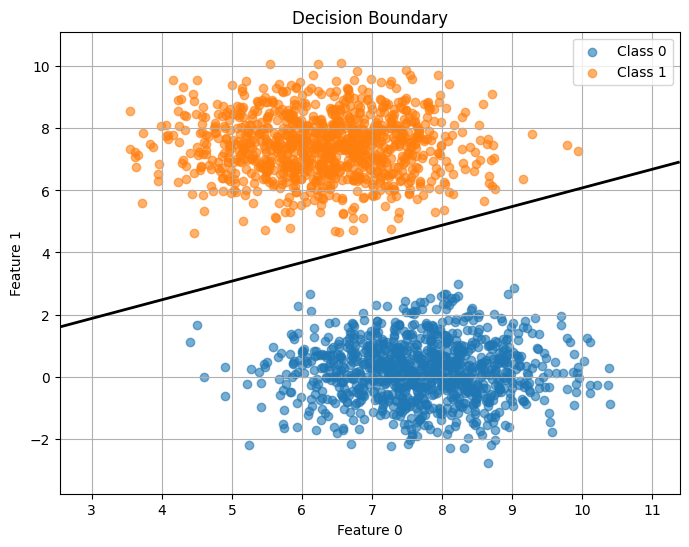

In [43]:
class Scheduler:
    def __init__(self, n):
        self.k = 0
        self.n = n
        self.i = 1

    def get_next_lr(self):
        self.k += (self.i % self.n)
        self.i += 1
        if self.k != 0:
          return 1/ np.sqrt(self.k)
        else:
          return 1

def train_single_sample(a, y, labels, n_iterations=30001, lr=1, variable_lr=False):
    acc_history = []
    n = len(y)
    if variable_lr:
        scheduler = Scheduler(n)
    else:
        scheduler = None

    for i in range(n_iterations):
        idx = i % n
        if labels[idx] == 1:
            true_label = 1
        else:
            true_label = -1

        dot_prod = np.dot(a, y[idx])

        if dot_prod >= 0:
            pred = 1
        else:
            pred = -1

        if pred != true_label:
            if variable_lr:
                alpha = scheduler.get_next_lr()
            else:
                alpha = lr
            a = a + alpha * true_label * y[idx]

        if i % n == 0:
            predictions = np.sign(np.dot(y, a))
            true_labels = np.where(labels == 1, 1, -1)
            acc = np.mean(predictions == true_labels)
            acc_history.append(acc)
            print(f"Iteration {i}: Accuracy = {acc:.4f}")

    return a, acc_history

a_init = np.zeros(y.shape[1])
trained_a_var, acc_history_var = train_single_sample(a_init, y, labels, n_iterations=30001, lr=1, variable_lr=True)
plot_model(trained_a_var, X, labels)

The variable learning rate version also converged to **100% accuracy**, just **like the fixed-rate model**.

**Exercise 2: Batch Perceptron**

1. Create a function called `train_batch` that **implements the Batch Perceptron algorithm.**

The arguments of the function should be:

-  **a** := weights + bias (bias trick)
-  **y** := data + ’1’s (bias trick)
-  **labels**
-  **theta** := the value for the theta criterion
-  **batch_size**
-  **lr := learning rate**
-  **variable_lr** := boolean

and the function should **return**:

-  **a := trained model**
-  **acc_history** := list of accuracy values
-  **error_history** := list of error values

**The function should print the model’s accuracy** and **the error at every iteration.** The error here is the sum of the absolute values of the updates.

In [26]:
def train_batch(a, y, labels, theta=0.01, batch_size=16, lr=1, variable_lr=False):
    acc_history = []
    error_history = []
    n = len(y)
    if variable_lr:
        scheduler = Scheduler(n)
    else:
        scheduler = None

    iteration = 0
    while True:
        updates = np.zeros_like(a)
        total_error = 0

        for i in range(0, n, batch_size):
            batch_y = y[i:i+batch_size]
            batch_labels = labels[i:i+batch_size]
            for j in range(len(batch_y)):
                if batch_labels[j] == 1:
                    true_label = 1
                else:
                    true_label = -1
                score = np.dot(a, batch_y[j])
                if score >= 0:
                    prediction = 1
                else:
                    prediction = -1
                if prediction != true_label:
                  if variable_lr:
                    alpha = scheduler.get_next_lr()
                  else:
                    alpha = lr
                  updates += alpha * true_label * batch_y[j]
                  total_error += np.abs(alpha * true_label * batch_y[j]).sum()

        a = a + updates

        predictions = np.sign(np.dot(y, a))
        true_labels = np.where(labels == 1, 1, -1)
        acc = np.mean(predictions == true_labels)
        acc_history.append(acc)
        error_history.append(total_error)
        print(f"Iteration {iteration}: Accuracy = {acc:.4f}, Error = {total_error:.4f}")
        iteration += 1

        if total_error < theta:
            break

    return a, acc_history, error_history

a_init = np.zeros(X_bias.shape[1])

trained_a_batch, acc_history_batch, error_history_batch = train_batch(
    a_init.copy(), X_bias, labels, theta=0.01, batch_size=16, lr=1, variable_lr=False
)
print("Trained batch model:", trained_a_batch)


Iteration 0: Accuracy = 0.5000, Error = 9473.7301
Iteration 1: Accuracy = 0.9505, Error = 14744.5846
Iteration 2: Accuracy = 0.9905, Error = 1027.1890
Iteration 3: Accuracy = 0.9960, Error = 207.0043
Iteration 4: Accuracy = 0.9975, Error = 81.4413
Iteration 5: Accuracy = 0.9975, Error = 47.6449
Iteration 6: Accuracy = 0.9975, Error = 47.6449
Iteration 7: Accuracy = 0.9980, Error = 47.6449
Iteration 8: Accuracy = 0.9980, Error = 38.3893
Iteration 9: Accuracy = 0.9980, Error = 38.3893
Iteration 10: Accuracy = 0.9980, Error = 38.3893
Iteration 11: Accuracy = 0.9985, Error = 38.3893
Iteration 12: Accuracy = 0.9990, Error = 26.1636
Iteration 13: Accuracy = 0.9990, Error = 18.9845
Iteration 14: Accuracy = 0.9990, Error = 18.9845
Iteration 15: Accuracy = 0.9990, Error = 18.9845
Iteration 16: Accuracy = 0.9990, Error = 18.9845
Iteration 17: Accuracy = 0.9990, Error = 18.9845
Iteration 18: Accuracy = 0.9995, Error = 18.9845
Iteration 19: Accuracy = 0.9995, Error = 9.7813
Iteration 20: Accuracy 

2. **Train a linear model using the function** `train_batch` you have implemented.

 Use the following hyperparame- ters:
 - theta = 0.01
 - batch size = 16
 - lr = 1
 - variable lr = False.

 **Print the trained model.**

3. **Plot the history of the accuracy and the error during training.**


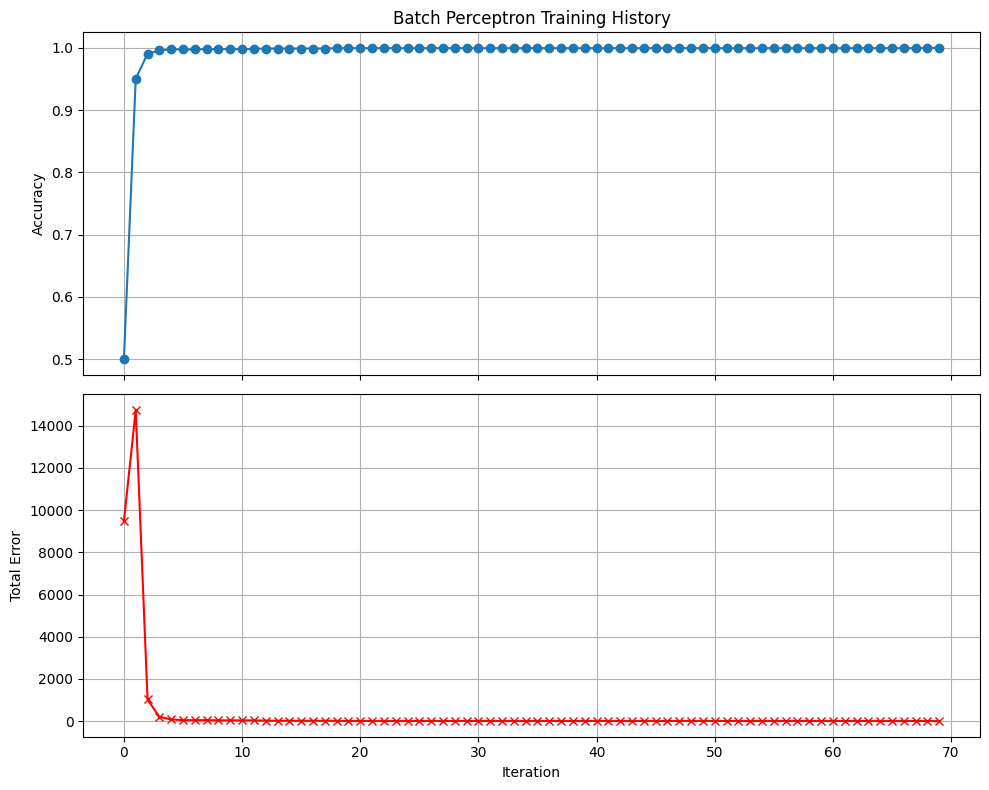

In [27]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

ax[0].plot(acc_history_batch, marker='o')
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Batch Perceptron Training History")
ax[0].grid(True)

ax[1].plot(error_history_batch, marker='x', color='red')
ax[1].set_ylabel("Total Error")
ax[1].set_xlabel("Iteration")
ax[1].grid(True)

plt.tight_layout()
plt.show()


4. **Plot the data and the trained model.** Use the `plot_model`function you implemented in Exercise 1.

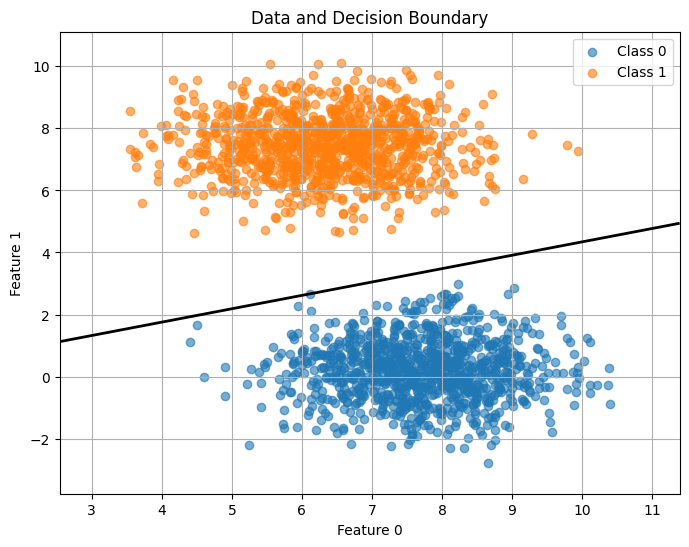

In [28]:
plot_model(trained_a_batch, X, labels)

**The decision boundary from the Batch Perceptron separates the two classes cleanly, as expected for a linearly separable dataset.**

5. **Retrain the model with a variable learning rate.** Use the Scheduler you implemented in Exercise 1. **Plot the dataset** and **the trained model** using `plot_model`.
- What is the **main difference** compared to training with a fixed learning rate?
- What **method** do you think is better? **Justify your answer.**
- **Discuss the expected behavior** of the two algorithms: the Fixed-Increment Single-Sample Perceptron and the Batch Perceptron algorithm.


Iteration 0: Accuracy = 0.5000, Error = 94.0512
Iteration 1: Accuracy = 0.5000, Error = 14.4522
Iteration 2: Accuracy = 0.5000, Error = 10.0362
Iteration 3: Accuracy = 0.5000, Error = 8.3452
Iteration 4: Accuracy = 0.5000, Error = 7.2284
Iteration 5: Accuracy = 0.5000, Error = 6.5049
Iteration 6: Accuracy = 0.5020, Error = 5.9402
Iteration 7: Accuracy = 0.5170, Error = 5.4960
Iteration 8: Accuracy = 0.5480, Error = 5.0041
Iteration 9: Accuracy = 0.5970, Error = 4.4591
Iteration 10: Accuracy = 0.6575, Error = 3.7822
Iteration 11: Accuracy = 0.7255, Error = 3.1427
Iteration 12: Accuracy = 0.7795, Error = 2.4303
Iteration 13: Accuracy = 0.8300, Error = 1.8969
Iteration 14: Accuracy = 0.8545, Error = 1.4484
Iteration 15: Accuracy = 0.8780, Error = 1.2277
Iteration 16: Accuracy = 0.8960, Error = 1.0147
Iteration 17: Accuracy = 0.9070, Error = 0.8538
Iteration 18: Accuracy = 0.9180, Error = 0.7526
Iteration 19: Accuracy = 0.9250, Error = 0.6588
Iteration 20: Accuracy = 0.9340, Error = 0.5942

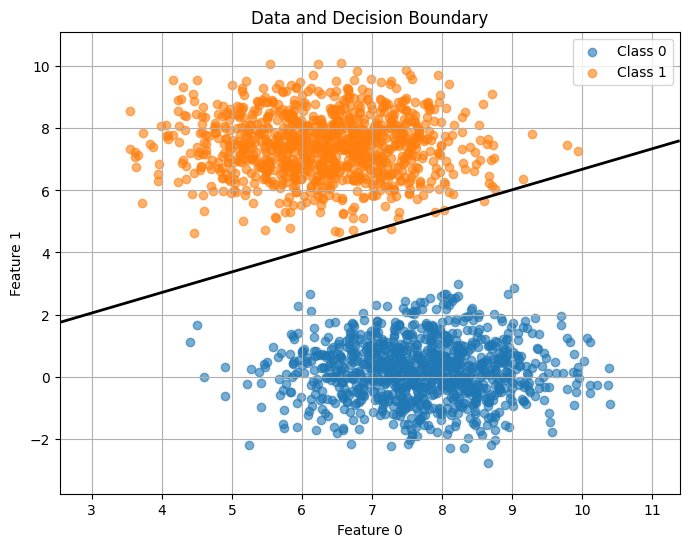

In [29]:
a_init = np.zeros(X_bias.shape[1])
trained_a_batch_var, acc_history_batch_var, error_history_batch_var = train_batch(
    a_init, X_bias, labels, theta=0.01, batch_size=16, lr=1, variable_lr=True
)

plot_model(trained_a_batch_var, X, labels)


Retraining the Batch Perceptron with a decreasing learning rate **made convergence slower but smoother**. It reached just under 100% accuracy with smaller, more stable updates. **The key difference is that the shrinking learning rate prevents big jumps, making it less likely to overshoot—helpful for messy or tricky data.**

A **fixed learning rate is faster** and works fine for clean, easy-to-separate data like ours. But the decreasing rate is better for real-world cases where data isn’t perfect.  

Overall, the **Batch Perceptron** is **steadier** because it averages updates across all samples. Meanwhile, the **Single-Sample Perceptron reacts faster** to each mistake but can be jumpier and less reliable.